In [1]:
# -*- coding: utf-8 -*-
# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import datetime as dt
from datetime import date, datetime, time
from babel.dates import format_date, format_datetime, format_time, get_month_names
import locale

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from math import pi

# charting:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# the module that has all the methods for handling the data
import resources.featuredata as featuredata

# home brew utitilties
import resources.chart_kwargs as ck
import resources.sr_ut as sut

# images and display
from IPython.display import Markdown as md
from myst_nb import glue

# chart style
sns.set_style("whitegrid")

# colors for gradients
cmap2 = ck.cmap2
colors_palette = ck.colors_palette
bassin_pallette = featuredata.bassin_pallette


# border and row shading fro tables
a_color = "saddlebrown"
table_row = "saddlebrown"

## !! Begin Note book variables !!
# There are two language variants: german and english
# change both: date_lang and language
date_lang =  'de_DE.utf8'
locale.setlocale(locale.LC_ALL, date_lang)

# the date format of the survey data is defined in the module
date_format = featuredata.date_format

# the language setting use lower case: en or de
# changing the language may require changing the unit label
language = "de"
unit_label = "p/100 m"

# the standard date format is "%Y-%m-%d" if your date column is
# not in this format it will not work.
# these dates cover the duration of the IQAASL project
start_date = "2020-03-01"
end_date ="2021-05-31"
start_end = [start_date, end_date]

# the fail rate used to calculate the most common codes is
# 50% it can be changed:
fail_rate = 50

# Changing these variables produces different reports
# Call the map image for the area of interest
bassin_map = "resources/maps/survey_areas/aare_scaled.jpeg"

# the label for the aggregation of all data in the region
top = "Alle Erhebungsgebiete"

# define the feature level and components
# the feature of interest is the Aare (aare) at the river basin (river_bassin) level.
# the label for charting is called 'name'
this_feature = {'slug':'all', 'name':"Alle Erhebungsgebiete", 'level':'all'}

# these are the smallest aggregated components
# choices are water_name_slug=lake or river, city or location at the scale of a river bassin 
# water body or lake maybe the most appropriate
this_level = 'river_bassin'

# !! End note book variables !!

## data
# Survey location details (GPS, city, land use)
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
# set the index of the beach data to location slug
dfBeaches.set_index("slug", inplace=True)

# Survey dimensions and weights
dfDims = pd.read_csv("resources/corrected_dims.csv")

# code definitions
dxCodes = pd.read_csv("resources/codes_with_group_names")
dxCodes.set_index("code", inplace=True)

# columns that need to be renamed. Setting the language will automatically
# change column names, code descriptions and chart annotations
columns={"% to agg":"% agg", "% to recreation": "% recreation", "% to woods":"% woods", "% to buildings":"% buildings", "p/100m":"p/100 m"}

# key word arguments to construct feature data
# !Note the water type allows the selection of river or lakes
# if None then the data is aggregated together. This selection
# is only valid for survey-area reports or other aggregated data
# that may have survey results from both lakes and rivers.
fd_kwargs ={
    "filename": "resources/checked_sdata_eos_2020_21.csv",
    "feature_name": this_feature['slug'], 
    "feature_level": this_feature['level'], 
    "these_features": this_feature['slug'], 
    "component": this_level, 
    "columns": columns, 
    "language": 'de', 
    "unit_label": unit_label, 
    "fail_rate": fail_rate,
    "code_data":dxCodes,
    "date_range": start_end,
    "water_type": None,    
}

fdx = featuredata.Components(**fd_kwargs)

# call the reports and languages
fdx.adjustForLanguage()
fdx.makeFeatureData()
fdx.locationSampleTotals()
fdx.makeDailyTotalSummary()
fdx.materialSummary()
fdx.mostCommon()
# !this is the feature data!
fd = fdx.feature_data

# the period data is all the data that was collected
# during the same period from all the other locations
# not included in the feature data for a survey area
# or river bassin the parent and feature level are the
# the same.
period_kwargs = {
    "period_data": fdx.period_data,
    "these_features": this_feature['slug'],
    "feature_level":this_feature['level'],
    "feature_parent":this_feature['slug'],
    "parent_level": this_feature['level'],
    "period_name": top,
    "unit_label": unit_label,
    "most_common": fdx.most_common.index
}
period_data = featuredata.PeriodResults(**period_kwargs)

# the rivers are considered separately
# select only the results from rivers
fd_kwargs.update({"water_type":"r"})
fdr = featuredata.Components(**fd_kwargs)
fdr.makeFeatureData()
fdr.adjustForLanguage()
fdr.locationSampleTotals()
fdr.makeDailyTotalSummary()
fdr.materialSummary()
fdr.mostCommon()

# collects the summarized values for the feature data
# use this to generate the summary data for the survey area
# and the section for the rivers
admin_kwargs = {
    "data":fd,
    "dims_data":dfDims,
    "label": this_feature["name"],
    "feature_component": this_level,
    "date_range":start_end,
    **{"dfBeaches":dfBeaches}
}
admin_details = featuredata.AdministrativeSummary(**admin_kwargs)
admin_summary = admin_details.summaryObject()
admin_r_details = featuredata.AdministrativeSummary(data=fdr.feature_data, dims_data=dfDims, label=this_feature["name"], feature_component=this_level, date_range=start_end, **{"dfBeaches":dfBeaches})

admin_kwargs.update({"data":fdr.feature_data})
admin_r_details = featuredata.AdministrativeSummary(**admin_kwargs)
admin_r_summary = admin_r_details.summaryObject()

### GIS Return

The Aare survey area was divided into 500 m hexagons (hex grid). The landcover values and road lengths were extracted from the SWISS TLM REGIO map layers and assigned to the corresponding hexagon, for each hexagon in the hex grid. Geometries that were invalid or could not be assigned a value were skipped. In total there were X records skipped out of. There were no skipped hexagons that contained a survey location. That is to say all survey locations have a corresponding hexagon with land use and road length values.

#### The location-hex key

Each location has a corresponding hex_id. Other values can be assigned to the same hexagon. 

In [2]:
location_hex_key = pd.read_csv("resources/input/location_hex_key.csv")
location_key = location_hex_key[["hex_id", "location"]].set_index("hex_id")
location_key.head()

,location
hex_id,
54155,la-thiele_le-mujon_confluence
54590,pecos-plage
55478,signalpain
55921,la-petite-plage
65196,ruisseau-de-la-croix-plage


#### Road Length

The length for each "type" of road for each hex. The road length for the survey location *pecos-plage*

In [3]:
road_length = pd.read_csv("resources/input/road_length.csv")
road_length_aare = road_length[["hex_id", "OBJVAL", "MED", "length"]]
road_length["hex_id"] = road_length["hex_id"].astype("int")
road_length = road_length.groupby(["hex_id","OBJVAL"], as_index=False).length.sum()
road_length["variable"] = "roads"
road_length.rename(columns={"length":"value", "OBJVAL": "label"}, inplace=True)
road_length =road_length[["hex_id", "variable", "label", "value"]].copy()
road_length[road_length.hex_id == 54590]

,hex_id,variable,label,value
107,54590,roads,HauptStrAB6,385


__The different types of roads__

In [4]:
road_length.label.unique()

array(['NebenStr3', 'VerbindStr6', 'Fahrstraes', 'Autobahn',
       'HauptStrAB6', 'NebenStr6', 'Fussweg', 'VerbindStr4', 'Autob_Ri',
       'HauptStrAB4', 'Autostr'], dtype=object)

#### Land-cover

The land cover for the hexagon that contains *pecos-plage*

In [5]:
land_use = pd.read_csv("resources/input/land_use_aare.csv")
land_use["hex_id"] = land_use.hex_id.fillna(0)
land_use["hex_id"] = land_use.hex_id.astype(int)
cols = ["hex_id", "OBJVAL", "area"]
survey_land_use = land_use[cols].groupby(["hex_id", "OBJVAL"], as_index=False).area.sum()
survey_land_use["variable"] = "landcover"
survey_land_use.rename(columns={"area":"value", "OBJVAL": "label"}, inplace=True)
survey_land_use =survey_land_use[["hex_id", "variable", "label", "value"]].copy()
survey_land_use[survey_land_use.hex_id == 54590]

,hex_id,variable,label,value
78,54590,landcover,See,92293.560
79,54590,landcover,Siedl,67611.049


__The differnt types of landcover__

In [6]:
survey_land_use.label.unique()

array(['Fels', 'Geroell', 'Gletscher', 'Obstanlage', 'Reben', 'See',
       'Siedl', 'Wald', 'Sumpf', 'Stadtzentr', 'Stausee'], dtype=object)

In [7]:
survey_land_use[survey_land_use.hex_id == 51058]

,hex_id,variable,label,value
10,51058,landcover,Wald,93062.365


### Scaling the land use variables and survey results

The roads are given in meters and the land-cover in m². Both values will be scaled using the following: $ X{scaled} = \frac{X - X{min}}{X{max} - X{min}}$.

__Assumptions:__

The landuse proximal to a survey location has a direct impact on the type and quantity of objects found on the beach.

In [66]:
def scaleTheColumn(x, xmin, xmax):
    
    if xmax-xmin == 0:
        denom = 0.001
    else:
        denom = xmax-xmin
    xscaled = (x-xmin)/denom
    
    return xscaled

xmin = survey_land_use.value.min()
xmax = survey_land_use.value.max()
survey_land_use["scaled"] = survey_land_use.value.apply(lambda x: scaleTheColumn(x, xmin, xmax))

# redeine max min for the roads
xmin = road_length.value.min()
xmax = road_length.value.max()
road_length["scaled"] = road_length.value.apply(lambda x: scaleTheColumn(x, xmin, xmax))

astring= f"""
    The land-cover variable scaled: 
    
    {survey_land_use.scaled.describe()}
    """
print(astring)


    The land-cover variable scaled: 
    
    count    20372.000000
mean         0.481508
std          0.346974
min          0.000000
25%          0.157597
50%          0.439060
75%          0.808814
max          1.000000
Name: scaled, dtype: float64
    


In [67]:
astring= f"""
    The road_length variable scaled: 
    
    {road_length.scaled.describe()}
    """
print(astring)


    The road_length variable scaled: 
    
    count    10431.000000
mean         0.268084
std          0.138596
min          0.000000
25%          0.174084
50%          0.283377
75%          0.339660
max          1.000000
Name: scaled, dtype: float64
    


In [68]:
# the sample values:
mask = fdx.feature_data.river_bassin == "aare"
aare_samps = fdx.feature_data[mask].copy()
xmin = aare_samps["p/100 m"].min()
xmax = aare_samps["p/100 m"].max()
aare_samps["scaled"] = aare_samps["p/100 m"].apply(lambda x: scaleTheColumn(x, xmin, xmax))

astring= f"""
    The survey values scaled: 
    
    {aare_samps.scaled.describe()}
    """
print(astring)


    The survey values scaled: 
    
    count    32200.000000
mean         0.003034
std          0.024663
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: scaled, dtype: float64
    


### Fluvial inputs

The number, class, size and distance of the river instersections within 2km of the survey location.

In [100]:
intersections = pd.read_csv("resources/input/distance_to_intersection.csv")
intersections = intersections[["location",  "NAMN_2", "BREITE", "KLASSE", "OBJVAL", "OBJVAL_2", "distance"]]
# intersections = intersections.drop_duplicates(["location", "NAMN_2","BREITE"])
intersections["distance"] = intersections.distance.astype(int)
intersections.rename(columns={"NAMN_2": "intersect", "BREITE":"size", "KLASSE": "klasse", "distance": "dist"}, inplace=True)
xmin = intersections.dist.min()
xmax = intersections.dist.max()
intersections.fillna(0)

intersections["dist_scaled"] = intersections.dist.apply(lambda x: scaleTheColumn(x, xmin, xmax))

xmin = intersections.klasse.min()
xmax = intersections.klasse.max()
intersections["klasse_scaled"] = intersections.klasse.apply(lambda x: scaleTheColumn(x, xmin, xmax))

xmin = intersections.size.min()
xmax = intersections.size.max()
intersections["size_scaled"] = intersections["size"].apply(lambda x: scaleTheColumn(x, xmin, xmax))

intersections["k/s"] = intersections["klasse"]/intersections["size"]
intersections["s/k"] = intersections["size"]/intersections["klasse"]
xmin = intersections["k/s"].min()
xmax = intersections["k/s"].max()

intersections["ks"] = intersections["k/s"].apply(lambda x: scaleTheColumn(x, xmin, xmax))
xmin = intersections["s/k"].min()
xmax = intersections["s/k"].max()
intersections["sk"] = intersections["s/k"].apply(lambda x: scaleTheColumn(x, xmin, xmax))
intersections["e_ks"] = 1/intersections["size"]+ intersections["klasse"]
intersections["e_sk"] = intersections["s/k"]/intersections["dist"]
intersections = intersections.drop_duplicates(["location", "intersect"])
inter_map = intersections[["location", "intersect", "size","size_scaled","k/s", "s/k", "ks", "sk", "e_ks", "e_sk", "klasse_scaled", "dist_scaled", "dist"]]
inter_map.head()

,location,intersect,size,size_scaled,k/s,s/k,ks,sk,e_ks,e_sk,klasse_scaled,dist_scaled,dist
0,plage-de-serriere,Le Seyon,8,-2314000.0,1.000000,1.000000,0.810811,0.054054,8.125000,0.001190,0.666667,0.420137,840
4,pointe-dareuse,L'Areuse,7,-2315000.0,1.000000,1.000000,0.810811,0.054054,7.142857,0.018868,0.500000,0.005271,53
5,pointe-dareuse,Le Vivier,9,-2313000.0,0.777778,1.285714,0.558559,0.162162,7.111111,0.002031,0.500000,0.311017,633
12,signalpain,Le Buron,8,-2314000.0,1.000000,1.000000,0.810811,0.054054,8.125000,0.003460,0.666667,0.129678,289
13,signalpain,Canal Oriental,18,-2304000.0,0.444444,2.250000,0.180180,0.527027,8.055556,0.023438,0.666667,0.027939,96


In [101]:
inter_map["size_scaled"].unique()

array([-2314000., -2315000., -2313000., -2304000., -2316000., -2308000.,
       -2312000., -2317000., -2307000., -2318000., -2302000.])

                    p/100 m  klasse_scaled         size          dist  \
p/100 m        29220.200250      25.009238    25.221946  9.749288e+04   
klasse_scaled     25.009238       5.363795     0.707827  6.191545e+03   
size              25.221946       0.707827     0.277886  2.129912e+03   
dist           97492.877903    6191.544569  2129.912072  2.534710e+07   
e_ks            1011.643919      59.788975    12.762705  1.036999e+05   

                        e_ks  
p/100 m          1011.643919  
klasse_scaled      59.788975  
size               12.762705  
dist           103699.949525  
e_ks              804.763129  


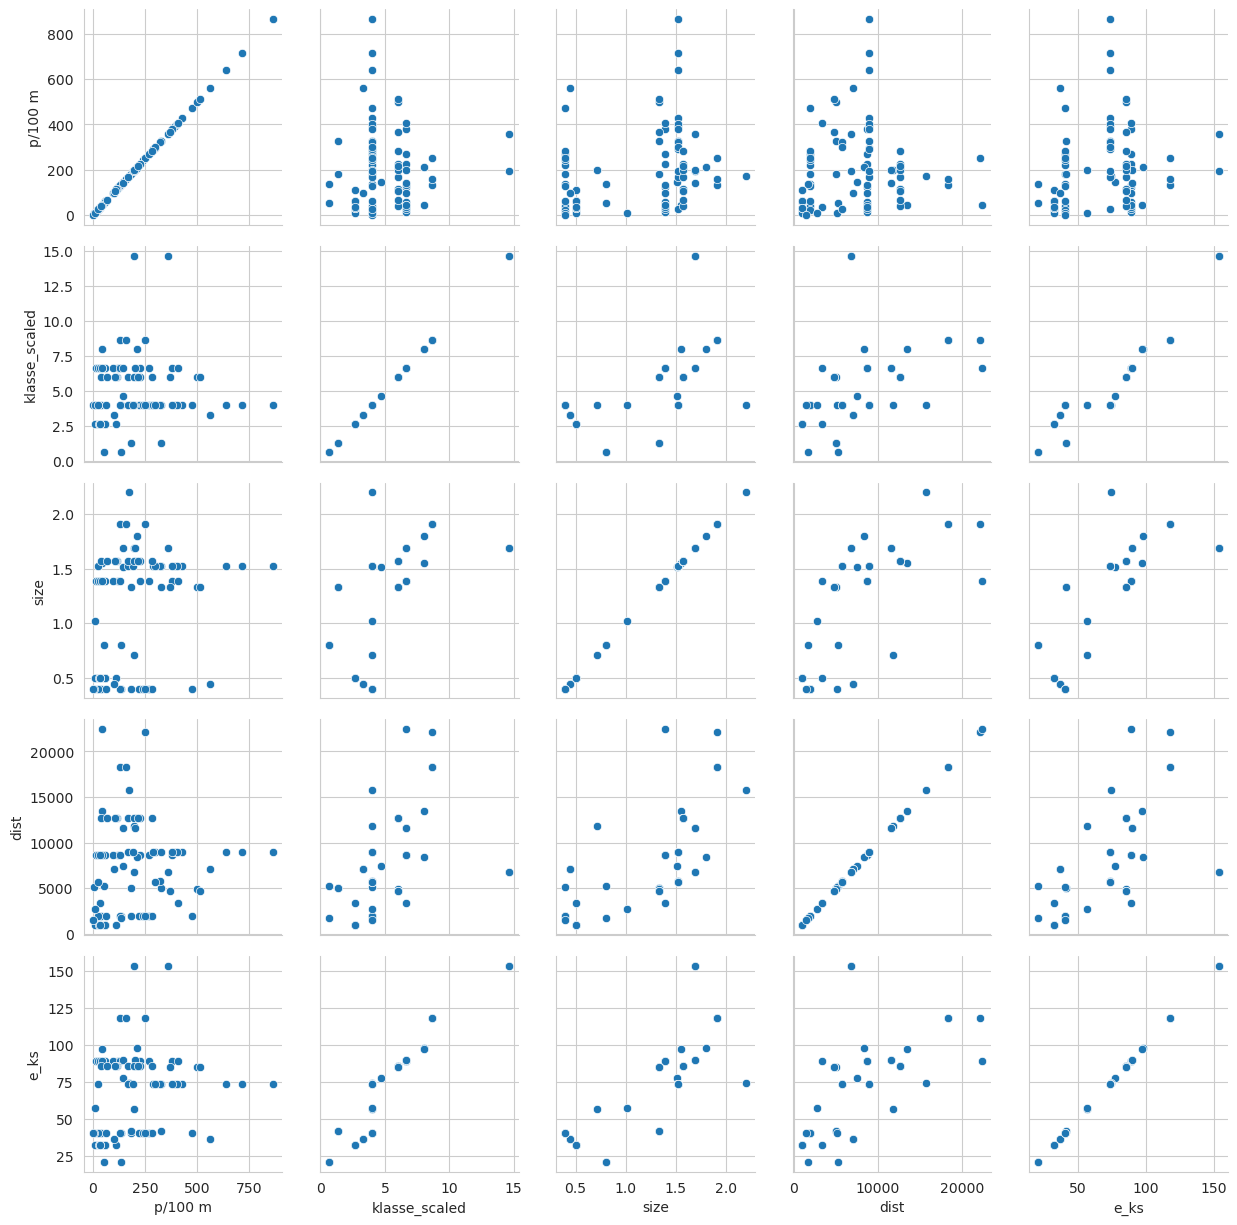

In [107]:
test_aare = fd[fd.river_bassin == "aare"].copy()

xmin = test_aare["p/100 m"].min()
xmax = test_aare["p/100 m"].max()

test_aare["p/100 ms"] = test_aare["p/100 m"].apply(lambda x: scaleTheColumn(x, xmin, xmax))



tdata = test_aare[["loc_date", "location","code", "p/100 m", "p/100 ms","water_name_slug"]].merge(inter_map, how="right", on="location")
codes = ["G67", "G95", "Gfrags", "Gfoam"]
tdata["size"] = 1/tdata["size"]
# tdata["dist"] = 1/tdata["dist"]
# xmin = tdata["dist"].min()
# xmax = tdata["dist"].max()
# tdata["dist"] = tdata["dist"].apply(lambda x: scaleTheColumn(x, xmin, xmax))
data = tdata[tdata.code.isin(codes)].groupby(["loc_date","water_name_slug"],as_index=False).agg({"dist":"sum", "p/100 ms":"sum", "p/100 m":"sum","size":"sum", "klasse_scaled":"sum", "dist_scaled":"sum","e_ks": "sum", "e_sk":"sum", "k/s":"sum", "s/k":"sum", "ks": "sum", "sk":"sum"})


cols = ["p/100 m", "klasse_scaled", "size", "dist", "e_ks"]

print(data[cols].cov())



agrid = sns.PairGrid(data[cols],)
agrid.map(sns.scatterplot)


In [108]:
intersections["klasse"]/intersections["size"]

0      1.000000
4      1.000000
5      0.777778
12     1.000000
13     0.444444
         ...   
234    0.444444
238    1.000000
246    1.000000
247    1.000000
249    1.000000
Length: 68, dtype: float64

In [86]:
# the cumulative effect of all the intersects for each location
intersections[["location", "intersect", "size", "klasse", "dist", "k/s", "effect"]][intersections.location == "wycheley"]

KeyError: "['effect'] not in index"

In [74]:
# the cumulative effect of all the intersects for each location
intersections[["location", "intersect", "size", "klasse",  "k/s", "dist", "effect"]][intersections.location == "oben-am-see"]

KeyError: "['effect'] not in index"

#### __Assumptions/Relation:__

1. There is a positive correlation between the size of the river or the class of the river and the quantity of trash it transports
2. The closer a survey location is to a river intersection point the more likely it is to receive trash from the intersection.
3. In general there is a negative correlation between a river intersection and the distance to any location on the lake.

__Background/Priors__

There is enough research that points to relations 1 and 2 (Seine maritime, Pay Bas). However, the contamination of remote Pacific Islands and Northern Europes coast line shows that even places far away from the source are seriously effected. The transport of plastics or more generally of trash on the Oceans is a well studied and documented process. A portion of the data is derived from _beach-litter-surveys_ conducted by a variety organizations. Trash has been monitored in the same fashion on Le Léman since November 2015. The combined effort has resulted in 312 samples from 145km of coastline. Furthermore, these samples were all conducted using the same protocol. 

As of 2020 the EU threshold for beach litter is 15 pieces of trash per 100 m (p/100m). The results for Switzerland in 2021 suggest a median value of 189 p/100m, the lowest values were in the Aare river catchment area and the Highest were in the Rhône catchment area (IQAASL). Recent sample data from Pays Bas have a mean of VALUE and median VALUE for VALUE samples. Relation one stems from the observations in Brienze and Bonnigen on the Brienzersee and Saint Gingolph on Lac Léman (both in Switzerland). These communities are located very near the mouth of major swiss rivers, Aare and Rhône respectively and are primarily rural communities. The amount of land that is étanche surrounding these surveys locations is low when compared to other communities in the survey. 

Lac Léman presents unique opportunities for researching the movement or deposition of trash on the shoreline. For example the resident time on the lake is 11 years, the water is moving slowly from Saint Gingolph to Geneva. There are not massive tidal events in relation to the ocean and there is an established culture and infrastructure dedicated to improving the conditions for the lakes wildlife. This includes litter campaigns, clean ups, communications and public education. Lac Léman is also urbanized, only 1% of the coastline is considered in a "natural state" and the real estate values are among the highest in the world.

__Enquiries__

1. Can the fluvial effect be used to predict trash values?
   1. Is there a higher probability of finding more trash at locations with a high fluvial effect?
   2. How likely are you to exceed the regional average in relation to the fluvial effect?
<br></br>
2. How does land use change the probability of finding an object?
   1. How does the probability of finding a given number of objects change when the land-use changes?
<br></br>
3. how does the probability of finding an object or a quantity of a group of objects change with location or region?
   1. Does the knowledge of the land-use change the expected result?
   2. If so, how reliable are the new assumptions?
   
The effects of land-use are calculated by using the meters squared (m²) of a 500 m hexagon that contains the sample location. This is a departure from the orginal method where the sample location was considered the reference point and the land use was considered as a function of the distance from the point. In this case a 500 m hex grid was made of Switzerland and the land use values for each 500 m hex were extracted from the Swss TLM Regio map. This set of maps has less detail than the first map but the data is complete with many relavent topographical categories labeled and classfied. For example the size and the class of the rivers on the map is detailed and defined in German and French. 

#### __Calculating Fluvial effects:__

__Definitions:__

* __size:__ german = "Kartografische“ Breite des Abschnitts, french = Largeur cartographique du tronçon, english = The size of the river at this section.

* __class:__ german = Breite, einheitlich über die ganze Länge, french = Importance, identique sur toute la longueur, english = The importance of the river, identical for the whole length.

The size value can vary depending on the location. the class variable is consistent for the whole variable. Note that the smaller the class the more important the river. The size attribute however reflects the actual size of the river at the point of intersection.




In [20]:
aare_samples["hydro_effect"] = aare_samples.location.map(lambda x: addEffect(x, intersect_effect))

code="G89"

test_samples = aare_samples[aare_samples.code == code].copy()

xmin = test_samples.pcs_m.min()
xmax = test_samples.pcs_m.max()
test_samples["scaled"] = test_samples.pcs_m.apply(lambda x: scaleTheColumn(x, xmin, xmax))

sns.scatterplot(data=test_samples, x="hydro_effect", y="scaled")

NameError: name 'intersect_effect' is not defined

In [ ]:
corr, a_p = stats.spearmanr(test_samples["hydro_effect"], test_samples["scaled"])

In [ ]:
corr

In [ ]:
a_p